# Dataset 1:heart_attack_prediction_India

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
import plotly.express as px
from IPython.display import HTML # 导入HTML
import plotly.graph_objects as go
import plotly.colors as pc

In [117]:
plt.rcParams['figure.max_open_warning']=0

In [118]:
file_path=r"F:\数据挖掘\Homework 1.1\archive\heart_attack_prediction_india.csv"
data=pd.read_csv(file_path)

In [119]:
#数据清洗
data=data.dropna()  #清洗掉缺失值
data=data.drop_duplicates()  # 删除重复的行
data.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [120]:
data.tail()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
9995,9996,Maharashtra,20,Female,0,0,0,1,0,1,...,74,1,1,10,0,0,167,1175023,1,0
9996,9997,Rajasthan,34,Female,0,0,0,0,0,0,...,78,0,1,1,0,0,123,999441,0,1
9997,9998,Gujarat,76,Male,0,0,0,0,0,0,...,98,1,0,1,0,1,376,159536,0,0
9998,9999,Andhra Pradesh,52,Male,0,0,0,0,0,1,...,60,1,0,7,1,0,313,153207,0,0
9999,10000,Haryana,25,Female,0,1,0,1,0,1,...,89,1,0,4,0,1,366,1732794,1,0


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level                10000 non-null

In [122]:
data.describe()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,5000.50000,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,...,89.312000,0.403600,0.311300,5.518800,0.311000,0.152500,206.383400,1.022062e+06,0.344700,0.300700
std,2886.89568,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,...,17.396486,0.490644,0.463048,2.866264,0.462926,0.359523,112.391711,5.605978e+05,0.475294,0.458585
min,1.00000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,...,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.035300e+04,0.000000,0.000000
25%,2500.75000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,...,74.000000,0.000000,0.000000,3.000000,0.000000,0.000000,110.000000,5.357838e+05,0.000000,0.000000
50%,5000.50000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,...,89.000000,0.000000,0.000000,6.000000,0.000000,0.000000,206.000000,1.021383e+06,0.000000,0.000000
75%,7500.25000,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,...,104.000000,1.000000,1.000000,8.000000,1.000000,0.000000,304.000000,1.501670e+06,1.000000,1.000000
max,10000.00000,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,...,119.000000,1.000000,1.000000,10.000000,1.000000,1.000000,399.000000,1.999714e+06,1.000000,1.000000


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level                10000 non-null

In [124]:
selected_data=data[['State_Name','Gender','Age','Diabetes','Obesity','Smoking','Family_History','Stress_Level','Heart_Attack_Risk']]

In [125]:
selected_data.head()

,State_Name,Gender,Age,Diabetes,Obesity,Smoking,Family_History,Stress_Level,Heart_Attack_Risk
0,Rajasthan,Female,42,0,1,1,0,4,0
1,Himachal Pradesh,Male,26,0,0,0,0,7,0
2,Assam,Male,78,0,1,0,1,10,0
3,Odisha,Male,58,1,1,0,0,1,0
4,Karnataka,Male,22,0,0,0,0,9,1


In [126]:
selected_data.tail()

,State_Name,Gender,Age,Diabetes,Obesity,Smoking,Family_History,Stress_Level,Heart_Attack_Risk
9995,Maharashtra,Female,20,0,0,1,1,10,0
9996,Rajasthan,Female,34,0,0,0,1,1,1
9997,Gujarat,Male,76,0,0,0,0,1,0
9998,Andhra Pradesh,Male,52,0,0,0,0,7,0
9999,Haryana,Female,25,0,0,1,0,4,0


In [127]:
selected_data.describe()

,Age,Diabetes,Obesity,Smoking,Family_History,Stress_Level,Heart_Attack_Risk
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.394900,0.092900,0.303700,0.301400,0.311300,5.518800,0.300700
std,17.280301,0.290307,0.459878,0.458889,0.463048,2.866264,0.458585
min,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
75%,64.000000,0.000000,1.000000,1.000000,1.000000,8.000000,1.000000
max,79.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


In [128]:
selected_data.head()

,State_Name,Gender,Age,Diabetes,Obesity,Smoking,Family_History,Stress_Level,Heart_Attack_Risk
0,Rajasthan,Female,42,0,1,1,0,4,0
1,Himachal Pradesh,Male,26,0,0,0,0,7,0
2,Assam,Male,78,0,1,0,1,10,0
3,Odisha,Male,58,1,1,0,0,1,0
4,Karnataka,Male,22,0,0,0,0,9,1


In [129]:
heart_attack_data=selected_data[selected_data['Heart_Attack_Risk'] == 1]

In [130]:
heart_attack_data.head()

,State_Name,Gender,Age,Diabetes,Obesity,Smoking,Family_History,Stress_Level,Heart_Attack_Risk
4,Karnataka,Male,22,0,0,0,0,9,1
10,Odisha,Male,56,0,0,1,0,10,1
15,Karnataka,Female,26,0,0,0,1,3,1
17,Bihar,Male,23,0,0,0,0,7,1
20,Maharashtra,Male,72,0,0,0,1,7,1


In [131]:
heart_attack_data=heart_attack_data[['State_Name','Gender','Age','Diabetes','Obesity','Smoking','Family_History']]

In [132]:
heart_attack_data.head()

,State_Name,Gender,Age,Diabetes,Obesity,Smoking,Family_History
4,Karnataka,Male,22,0,0,0,0
10,Odisha,Male,56,0,0,1,0
15,Karnataka,Female,26,0,0,0,1
17,Bihar,Male,23,0,0,0,0
20,Maharashtra,Male,72,0,0,0,1


In [133]:
# 测试数据是否有误

count_1=heart_attack_data[(heart_attack_data['Age']>=20)&(heart_attack_data['Age']<25)].shape[0]
count_2=heart_attack_data[(heart_attack_data['Age']>=25)&(heart_attack_data['Age']<30)].shape[0]
count_3=heart_attack_data[(heart_attack_data['Age']>=30)&(heart_attack_data['Age']<35)].shape[0]
count_4=heart_attack_data[(heart_attack_data['Age']>=35)&(heart_attack_data['Age']<40)].shape[0]
print(count_1)
print(count_2)
print(count_3)
print(count_4)

240
239
244
280


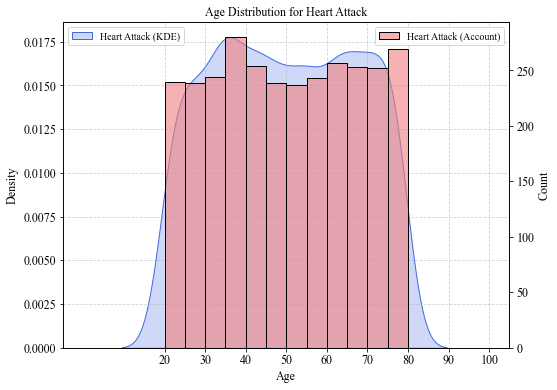

In [134]:
#使用searborn库

plt.rcParams['font.family'] = 'Times New Roman'
fig, ax1=plt.subplots(figsize=(8, 6))

sns.kdeplot(heart_attack_data['Age'], color='royalblue', label='Heart Attack (KDE)',shade=True, ax=ax1)


ax1.set_ylabel('Density', fontsize=12)


ax2=ax1.twinx()
ax2.set_ylabel('Count',fontsize=12)

bins=[0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]
labels=['0-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-100']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)



# 绘制柱状图，按年龄段显示有心脏病风险的患者数量
# 使用seaborn库中的柱状图绘制工具，输入的数据为筛选出的心脏风险患者的数据，将'Age'列作为横坐标，使用bins对横坐标进行分组，分成好多组
# ax=ax2表示在第二个y轴进行绘图，stat='count'代表纵坐标是这个区间数据点的数量
sns.histplot(heart_attack_data, x='Age', bins=bins, kde=False, multiple='dodge', stat='count', ax=ax2, alpha=0.6, color='lightcoral', label='Heart Attack (Account)')


plt.title('Age Distribution for Heart Attack')

# 设置x轴的标签
ax1.set_xlabel('Age',fontsize=12)

plt.xticks(ticks=range(20, 101, 10), labels=['20', '30', '40', '50', '60', '70', '80', '90', '100'],fontsize=12)

ax1.grid(True, linestyle='--', alpha=0.6)


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.tick_params(axis='y',labelsize=12)  
ax2.tick_params(axis='y',labelsize=12)  
ax1.tick_params(axis='x',labelsize=12)

plt.show()


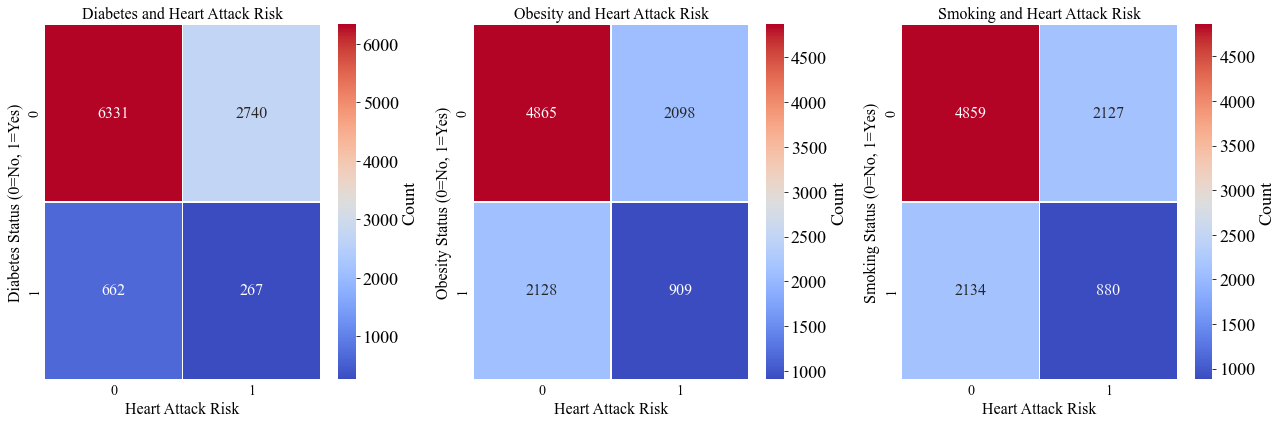

In [135]:
#使用seaborn库
plt.rcParams['font.family']='Times New Roman'
diseases=['Diabetes', 'Obesity', 'Smoking']

fig, axes=plt.subplots(1, len(diseases),figsize=(6 * len(diseases), 6))

if len(diseases)==1:
    axes=[axes]
for i in range(len(diseases)):
    ct=pd.crosstab(selected_data[diseases[i]],selected_data['Heart_Attack_Risk'])
    

    sns.heatmap(ct, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5, 
                linecolor='white', cbar_kws={'label': 'Count'}, ax=axes[i],
                annot_kws={'size': 16})


    colorbar=axes[i].collections[0].colorbar
    colorbar.ax.tick_params(labelsize=18)  

    colorbar=axes[i].collections[0].colorbar
    colorbar.set_label('Count', fontsize=18)  
    
    axes[i].set_title(f'{diseases[i]} and Heart Attack Risk', fontsize=16)
    axes[i].set_xlabel('Heart Attack Risk', fontsize=16)
    axes[i].set_ylabel(f'{diseases[i]} Status (0=No, 1=Yes)', fontsize=16)
    axes[i].tick_params(axis='both', which='both', length=0, labelsize=12)

    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=14)  
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=14)  

plt.tight_layout()
plt.show()


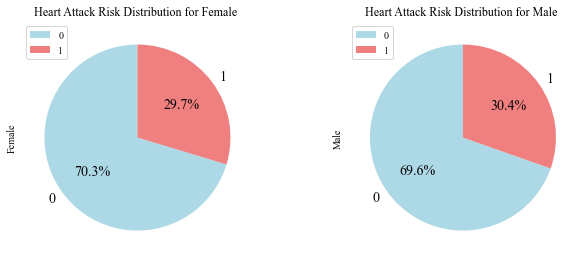

In [136]:
#使用pandas库
plt.rcParams['font.family']='Times New Roman'
gender_risk=pd.crosstab(selected_data['Gender'],selected_data['Heart_Attack_Risk'])

gender_0_risk=gender_risk.loc['Female']  
gender_1_risk=gender_risk.loc['Male'] 


plt.figure(figsize=(10,6))  

plt.subplot(1,2,1)
gender_0_risk.plot(kind='pie', autopct='%1.1f%%',startangle=90, colors=['lightblue','lightcoral','lightgreen'],legend=True,textprops={'fontsize': 14})
plt.title('Heart Attack Risk Distribution for Female ',fontsize=12)


plt.subplot(1,2,2)
gender_1_risk.plot(kind='pie', autopct='%1.1f%%',startangle=90, colors=['lightblue','lightcoral','lightgreen'],legend=True,textprops={'fontsize': 14})
plt.title('Heart Attack Risk Distribution for Male ',fontsize=12)

plt.subplots_adjust(wspace=0.4) 

plt.show()


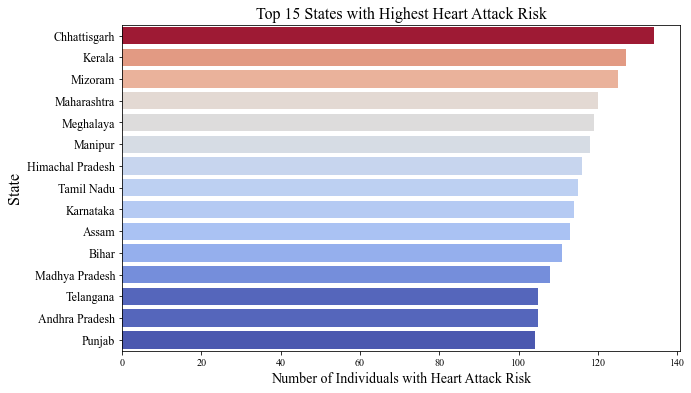

In [137]:
#使用seaborn库
plt.rcParams['font.family'] = 'Times New Roman'
disease_counts=selected_data[selected_data['Heart_Attack_Risk'] == 1].groupby('State_Name').size().reset_index(name='count')
sorted_count=disease_counts.sort_values(by='count', ascending=False)
top_10_data=sorted_count.head(15).copy()  

cmap=plt.get_cmap('coolwarm')
norm=mcolors.Normalize(vmin=top_10_data['count'].min(), vmax=top_10_data['count'].max())


top_10_data.loc[:, 'color'] = top_10_data['count'].apply(lambda x: cmap(norm(x)))


plt.figure(figsize=(10, 6))
ax=sns.barplot(x='count', y='State_Name', data=top_10_data, palette=top_10_data['color'])


plt.title('Top 15 States with Highest Heart Attack Risk', fontsize=16)
plt.xlabel('Number of Individuals with Heart Attack Risk', fontsize=14)
plt.ylabel('State', fontsize=16)
plt.yticks(fontsize=12)

plt.show()


# Dataset 2:Mobiles Datasets

In [138]:
file_path_2=r"F:\数据挖掘\Homework 1.1\archive (1)\Mobiles Dataset (2025).csv"

In [139]:
dataset_2=pd.read_csv(file_path_2,encoding='ISO-8859-1')

In [140]:
dataset_2.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [141]:
dataset_2.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,Not available,"INR 200,999","CNY 17,999","USD 2,259","AED 8,699",2024


In [142]:
selected_data_2=dataset_2[dataset_2['Company Name']=='Apple']

In [143]:
selected_data_2.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [144]:
selected_data_2.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
92,Apple,iPad Pro 13-inch 128GB,708g,6GB,7MP,12MP + 10MP,A12Z Bionic,"10,307mAh",13 inches,"PKR 259,999","INR 119,900","CNY 8,699","USD 1,099","AED 4,499",2020
93,Apple,iPad Pro 13-inch 256GB,708g,6GB,7MP,12MP + 10MP,A12Z Bionic,"10,307mAh",13 inches,"PKR 279,999","INR 139,900","CNY 9,199","USD 1,199","AED 4,799",2020
94,Apple,iPad Pro 13-inch 512GB,708g,6GB,7MP,12MP + 10MP,A12Z Bionic,"10,307mAh",13 inches,"PKR 309,999","INR 159,900","CNY 9,799","USD 1,399","AED 5,299",2020
95,Apple,iPad Pro 13-inch 1TB,708g,6GB,7MP,12MP + 10MP,A12Z Bionic,"10,307mAh",13 inches,"PKR 359,999","INR 179,900","CNY 10,399","USD 1,599","AED 5,799",2020
96,Apple,iPad Pro 13-inch 2TB,708g,6GB,7MP,12MP + 10MP,A12Z Bionic,"10,307mAh",13 inches,"PKR 399,999","INR 199,900","CNY 11,199","USD 1,799","AED 6,099",2020


In [145]:
selected_data_2=selected_data_2[selected_data_2['Model Name'].str.contains("iPhone",na=False)]

In [146]:
selected_data_2.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
75,Apple,iPhone XS Max 256GB,208g,4GB,7MP,12MP + 12MP,A12 Bionic,"3,174mAh",6.5 inches,"PKR 269,999","INR 119,900","CNY 10,688","USD 1,249","AED 4,799",2018
76,Apple,iPhone XS Max 512GB,208g,4GB,7MP,12MP + 12MP,A12 Bionic,"3,174mAh",6.5 inches,"PKR 289,999","INR 129,900","CNY 11,288","USD 1,399","AED 5,099",2018
77,Apple,iPhone XR 64GB,194g,3GB,7MP,12MP + 12MP,A12 Bionic,"2,942mAh",6.1 inches,"PKR 149,999","INR 64,900","CNY 6,299",USD 749,"AED 2,699",2018
78,Apple,iPhone XR 128GB,194g,3GB,7MP,12MP + 12MP,A12 Bionic,"2,942mAh",6.1 inches,"PKR 159,999","INR 74,900","CNY 6,799",USD 799,"AED 3,099",2018
79,Apple,iPhone XR 256GB,194g,3GB,7MP,12MP + 12MP,A12 Bionic,"2,942mAh",6.1 inches,"PKR 179,999","INR 84,900","CNY 7,299",USD 899,"AED 3,399",2018


In [147]:
selected_data_2=selected_data_2[['Model Name','Mobile Weight','Launched Price (USA)','Launched Price (China)','Launched Year']]

In [148]:
selected_data_2.head()

,Model Name,Mobile Weight,Launched Price (USA),Launched Price (China),Launched Year
0,iPhone 16 128GB,174g,USD 799,"CNY 5,799",2024
1,iPhone 16 256GB,174g,USD 849,"CNY 6,099",2024
2,iPhone 16 512GB,174g,USD 899,"CNY 6,499",2024
3,iPhone 16 Plus 128GB,203g,USD 899,"CNY 6,199",2024
4,iPhone 16 Plus 256GB,203g,USD 949,"CNY 6,499",2024


In [149]:
selected_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Model Name              80 non-null     object
 1   Mobile Weight           80 non-null     object
 2   Launched Price (USA)    80 non-null     object
 3   Launched Price (China)  80 non-null     object
 4   Launched Year           80 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


In [150]:
selected_data_2.head()

,Model Name,Mobile Weight,Launched Price (USA),Launched Price (China),Launched Year
0,iPhone 16 128GB,174g,USD 799,"CNY 5,799",2024
1,iPhone 16 256GB,174g,USD 849,"CNY 6,099",2024
2,iPhone 16 512GB,174g,USD 899,"CNY 6,499",2024
3,iPhone 16 Plus 128GB,203g,USD 899,"CNY 6,199",2024
4,iPhone 16 Plus 256GB,203g,USD 949,"CNY 6,499",2024


In [151]:
selected_data_2['Launched Price (China)'] = selected_data_2['Launched Price (China)'].astype(str)
selected_data_2['Launched Price (China)'] = selected_data_2['Launched Price (China)'].str.replace('CNY ', '', regex=False)
selected_data_2['Launched Price (China)'] = selected_data_2['Launched Price (China)'].str.replace(',', '', regex=False)
selected_data_2['Launched Price (China)'] = selected_data_2['Launched Price (China)'].astype(float)

In [152]:
selected_data_2['Launched Price (USA)'] = selected_data_2['Launched Price (USA)'].astype(str)
selected_data_2['Launched Price (USA)'] = selected_data_2['Launched Price (USA)'].str.replace('USD ', '', regex=False)
selected_data_2['Launched Price (USA)'] = selected_data_2['Launched Price (USA)'].str.replace(',', '', regex=False)
selected_data_2['Launched Price (USA)'] = selected_data_2['Launched Price (USA)'].astype(float)

In [153]:
selected_data_2.head()

,Model Name,Mobile Weight,Launched Price (USA),Launched Price (China),Launched Year
0,iPhone 16 128GB,174g,799.0,5799.0,2024
1,iPhone 16 256GB,174g,849.0,6099.0,2024
2,iPhone 16 512GB,174g,899.0,6499.0,2024
3,iPhone 16 Plus 128GB,203g,899.0,6199.0,2024
4,iPhone 16 Plus 256GB,203g,949.0,6499.0,2024


In [154]:
save_path=r'F:\数据挖掘\Homework 1.1\archive (1)\Mobile Dataset Selected.csv'

In [155]:
#selected_data_2.to_csv(save_path)

In [156]:
selected_data_2.head()

,Model Name,Mobile Weight,Launched Price (USA),Launched Price (China),Launched Year
0,iPhone 16 128GB,174g,799.0,5799.0,2024
1,iPhone 16 256GB,174g,849.0,6099.0,2024
2,iPhone 16 512GB,174g,899.0,6499.0,2024
3,iPhone 16 Plus 128GB,203g,899.0,6199.0,2024
4,iPhone 16 Plus 256GB,203g,949.0,6499.0,2024


In [157]:
selected_data_2.tail()

,Model Name,Mobile Weight,Launched Price (USA),Launched Price (China),Launched Year
75,iPhone XS Max 256GB,208g,1249.0,10688.0,2018
76,iPhone XS Max 512GB,208g,1399.0,11288.0,2018
77,iPhone XR 64GB,194g,749.0,6299.0,2018
78,iPhone XR 128GB,194g,799.0,6799.0,2018
79,iPhone XR 256GB,194g,899.0,7299.0,2018


In [158]:
selected_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model Name              80 non-null     object 
 1   Mobile Weight           80 non-null     object 
 2   Launched Price (USA)    80 non-null     float64
 3   Launched Price (China)  80 non-null     float64
 4   Launched Year           80 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 3.1+ KB


In [159]:
#使用plotly库
price_by_year = selected_data_2.groupby('Launched Year')['Launched Price (China)'].mean().reset_index()
max_year=price_by_year['Launched Price (China)'].idxmax()
min_year=price_by_year['Launched Price (China)'].idxmin()
colors = ['green'] * len(price_by_year)
special_years = {max_year: 'red', min_year: 'blue'} 

for year, color in special_years.items():
    colors[year]=color
fig = px.line(price_by_year, x='Launched Year',y='Launched Price (China)',
              title='The average trend of product prices in different years',
              labels={'Launched Year': 'Year', 'Launched Price (China)': 'Average Price (CNY)'},
              color_discrete_sequence=['green'], 
              markers=True) 

fig.update_traces(marker=dict(color=colors, size=8))
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(
        title='Year',
        gridcolor='lightgrey',
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='Average price (CNY)',
        gridcolor='lightgrey',
        titlefont=dict(size=12),
    ),
    title_font=dict(size=14),
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()


In [160]:
print("\nThe result of calculating the average price by year grouping：")
print(price_by_year)


The result of calculating the average price by year grouping：
   Launched Year  Launched Price (China)
0           2017             8588.000000
1           2018             9091.666667
2           2019             7210.111111
3           2020             7007.333333
4           2021             6999.000000
5           2022             6899.000000
6           2023             6882.333333
7           2024             6932.333333


In [161]:
selected_data_2 = selected_data_2.sort_values(by='Mobile Weight')

In [162]:
#使用plotly库
selected_data_2['Mobile Weight']=selected_data_2['Mobile Weight'].astype(str)
selected_data_2['Mobile Weight']=selected_data_2['Mobile Weight'].str.replace('g', '').astype(float)

fig = px.scatter(selected_data_2,x='Mobile Weight', y='Launched Price (USA)',
                 title='The relationship between weight and price of mobile phone',
                 labels={'Mobile Weight': 'Mobile phone weight (g)', 'Launched Price (USA)': 'Price (USA)'},
                 hover_data=['Model Name', 'Launched Year'],  
                 color='Launched Year',  
                 size='Launched Price (USA)', 
                 opacity=0.7,  
                 trendline="ols")  
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(
        title='Mobile phone weight (g)',
        gridcolor='lightgrey',
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='Price (USA)',
        gridcolor='lightgrey',
        titlefont=dict(size=12),
    ),
    title_font=dict(size=14),
    margin=dict(l=20, r=20, t=60, b=20),
    legend_title="Year",  
)
fig.update_traces(
    marker=dict(
        line=dict(width=0.5, color='DarkSlateGrey'),  
    ),
    selector=dict(mode='markers')
)
fig.show()


In [163]:
#使用plotly库
fig=px.box(selected_data_2,x='Launched Year',y='Launched Price (China)',
             title='Box plots of product prices for different years',
             labels={'Launched Year':'Year','Launched Price (China)':'Price (CNY)'},
             color='Launched Year',
             category_orders={"Launched Year":sorted(selected_data_2['Launched Year'].unique(), reverse=True)}) 

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(
        title='Year',
        gridcolor='lightgrey',
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='Price (CNY)',
        gridcolor='lightgrey',
        titlefont=dict(size=12),
    ),
    title_font=dict(size=14),
    margin=dict(l=20, r=20, t=60, b=20),
    legend_title="Year",
)
fig.show()

In [164]:
#使用plotly库
fig = px.box(selected_data_2, x='Launched Year', y='Launched Price (USA)',
             title='Box plots of product prices for different years',
             labels={'Launched Year': 'Year', 'Launched Price (USA)': 'Price (USD)'},
             color='Launched Year',  
             category_orders={"Launched Year": sorted(selected_data_2['Launched Year'].unique(), reverse=True)}) #图例排序

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(
        title='Year',
        gridcolor='lightgrey',
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='Price (USD)',
        gridcolor='lightgrey',
        titlefont=dict(size=12),
    ),
    title_font=dict(size=14),
    margin=dict(l=20, r=20, t=60, b=20),
    legend_title="Year",
)

fig.show()

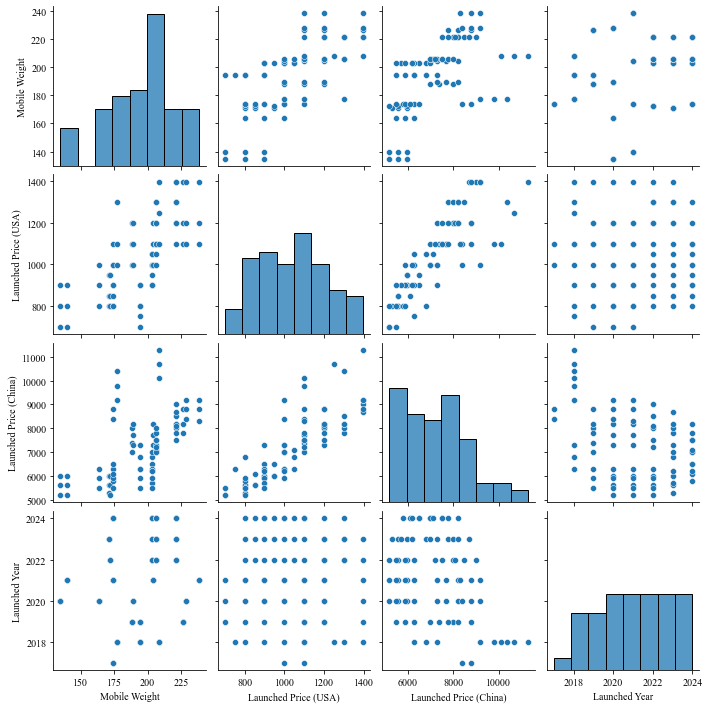

In [166]:
#使用seaborn库
sns.pairplot(selected_data_2)
plt.show()